In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
tf.set_random_seed(777) # for reproducibility

In [4]:
from  tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
nb_classes = 10

In [7]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [8]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [9]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [10]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [11]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [12]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 2.826302671
Epoch: 0002, Cost: 1.061668953
Epoch: 0003, Cost: 0.838061300
Epoch: 0004, Cost: 0.733232729
Epoch: 0005, Cost: 0.669279874
Epoch: 0006, Cost: 0.624611825
Epoch: 0007, Cost: 0.591160346
Epoch: 0008, Cost: 0.563868980
Epoch: 0009, Cost: 0.541745169
Epoch: 0010, Cost: 0.522673575
Epoch: 0011, Cost: 0.506782328
Epoch: 0012, Cost: 0.492447637
Epoch: 0013, Cost: 0.479955836
Epoch: 0014, Cost: 0.468893668
Epoch: 0015, Cost: 0.458703486
Learning finished
Accuracy:  0.8951
Label:  [1]
prediction:  [1]


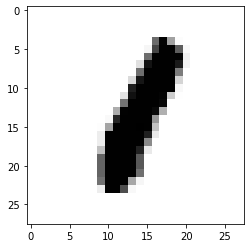

In [13]:
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train, cost], feed_dict = {X: batch_xs, Y: batch_ys})
      avg_cost += cost_val / num_iterations
    
    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
  
  print("Learning finished")

  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session = sess, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}
      ),
  )

  # Get one and predict
  r = random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
  print(
      "prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict = {X: mnist.test.images[r:r + 1]}),
  )

  plt.imshow(
      mnist.test.images[r:r + 1].reshape(28, 28),
      cmap = "Greys",
      interpolation = "nearest",
  )
  plt.show()